In [1]:
library(tidyverse)
library(ComplexHeatmap)
library(circlize)
library(maftools)
library(ggsignif)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPa

## 0.load maf data and clinical data

### 0.1 load clin

In [ ]:
mycol <- colorRampPalette(brewer.pal(11,'Spectral'))(12)[12:1]
alter_fun = list(
  background = function(x, y, w, h) {
    grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "#dcddde", col = NA))
  },  
  Multi_Hit = function(x, y, w, h) {
    grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "black", col = NA)) 
  },
  Missense_Mutation = function(x, y, w, h) {
    grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "#219f94", col = NA)) 
  },
  Nonsense_Mutation = function(x, y, w, h) {
    grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "#1d6ed0", col = NA)) 
  },
  Frame_Shift_Ins = function(x, y, w, h) {
    grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "#2a520c", col = NA)) 
  },
  Frame_Shift_Del = function(x, y, w, h) {
    grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "#ff6565", col = NA)) 
  },
  In_Frame_Ins = function(x, y, w, h) {
    grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "#e4ed2e", col = NA)) 
  },  
  In_Frame_Del = function(x, y, w, h) {
    grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "#ae441f", col = NA)) 
  },
  Splice_Site = function(x, y, w, h) {
    grid.rect(x, y, w*0.9, h*0.9, gp = gpar(fill = "#d39655", col = NA)) 
  }
)

col = c("Missense_Mutation" = "#219f94", 
        "Nonsense_Mutation" = "#1d6ed0", 
        "Frame_Shift_Ins" = "#2a520c", 
        "Frame_Shift_Del" = "#ff6565", 
        "In_Frame_Ins" = "#e4ed2e", 
        "In_Frame_Del" = "#ae441f", 
        "Splice_Site" ="#d39655",
        "Multi_Hit" = "black")

In [17]:
common_tumor_t_cell = common_tumor_t_cell[ common_clin_noAEH_noNAage_sort$Tumor_Sample_Barcode,]
common_final_purity = common_final_purity[common_clin_noAEH_noNAage_sort$Tumor_Sample_Barcode,]
common_Clin = common_Clin[common_clin_noAEH_noNAage_sort$Tumor_Sample_Barcode,]
common_fga = common_fga[common_clin_noAEH_noNAage_sort$Tumor_Sample_Barcode,]

In [18]:
tjfd_pct <- read.table("../../02.UCEC/Fig1A/TJFD_use_Syn_fraction_contribution.txt",sep="\t",header=T)
tjfd_pct = tjfd_pct[,c(1:4,6,5,7)]
rownames(tjfd_pct) <- tjfd_pct[,1]
tjfd_pct <- tjfd_pct[ common_clin_noAEH_noNAage_sort$Tumor_Sample_Barcode,]
pct_input = t(apply(tjfd_pct[,-1], 1, function(x) x/sum(x)))

colnames(pct_input) <- colnames(tjfd_pct[,-1])
rownames(pct_input) <- rownames(tjfd_pct)

spectrum = HeatmapAnnotation(foo = anno_barplot(pct_input, border = F,
                                                gp = gpar(fill = c("#4276b5","#91bfdc","#e1f3f9","#fce08f","#f58d5b","#d93027"),
                                                          col= c("#4276b5","#91bfdc","#e1f3f9","#fce08f","#f58d5b","#d93027")), 
                                                bar_width = 1),
                            annotation_legend_param = list(
                                                    labels = colnames(tjfd_pct[-1]),
                                                    title  =  "Mutation Spectrum",
                                                    legnth_gp = c("#4276b5","#91bfdc","#e1f3f9","#fce08f","#f58d5b","#d93027")))
                            

In [19]:
 lgd = Legend(
            labels = colnames(tjfd_pct[-1]),
            title  =  "Mutation Spectrum",
            title_position = "leftcenter",
             direction = "horizontal",
            legend_gp = gpar(fill = c("#4276b5","#91bfdc","#e1f3f9","#fce08f","#f58d5b","#d93027")),
             nrow =1 )

In [20]:
common_clin_noAEH_noNAage_sort$Obesity = ifelse(common_clin_noAEH_noNAage_sort$BMI >= 28,"Obesity","Normal")

In [59]:
pdf("Figure.1/Figure.1A.maf_oncoprint_age.pdf",width=10,height=12)
# 绘图
m1 <- oncoPrint(common_oncopritn_input[1:30,], get_type = function(x) x,
           alter_fun = alter_fun, col = col,
          show_pct = T, #show pct in left
          column_title = "",
          #bottom_annotation = my_annotation,
          show_heatmap_legend=T,
          column_title_gp = gpar(fontsize = 8),
          row_names_gp = gpar(fontsize = 7),
          row_names_side = "left",
          pct_side = "right",
          column_names_gp = gpar(fontsize = 6),
           column_split = factor(common_clin_noAEH_noNAage_sort$age_group,levels=c("Early","Old")),
          column_order = order(common_clin_noAEH_noNAage_sort$age_at_diagnosis),
          alter_fun_is_vectorized = FALSE,
          heatmap_legend_param = list(direction = "horizontal",nrow=2, title = ""),
          #column_order= rownames(common_clin_noAEH_noNAage_sort)[order(common_clin_noAEH_noNAage_sort$age_at_diagnosis,decreasing=T)],,
           top_annotation = HeatmapAnnotation(Nonsyn_Count = anno_barplot(common_Clin$Nonsynonymous_Count,border = F,gp = gpar(fill = "#1a78b4",col="#1a78b4"),annotation_name="Nonsyn Mutations",bar_width = 0.7,height = unit(2.5, "cm")),
                                             TCGA_Subtype=common_clin_noAEH_noNAage_sort$Subtype,
                                              Figo=common_Clin$stage_subtype, 
                                             Grade = common_Clin$clinical_grade,
                                             Age = common_clin_noAEH_noNAage_sort$detail_age_subtype,
                                              Obesity = common_clin_noAEH_noNAage_sort$Obesity,
                                              BMI = common_clin_noAEH_noNAage_sort$BMI,
                                             TP53 = common_Clin$TP53_status, 
                                            T_cell_frac = common_tumor_t_cell$TCRA.tcell.fraction,
                                              consensus_normal_purity = common_final_purity$median_normalize_purity, 
                                              Purbayes =common_final_purity$PurBayes,
                                              histology = common_final_purity$histology,
                                              fga = common_fga$FGA,
                                              gain = common_fga$GAIN,
                                              loss = common_fga$LOSS,
                                              wgd = common_fga$IS_WGD,
                                              annotation_label = c("Nonsyn Mutations","TCGA Subtype","Figo Stage","Figo Grade","Age","Obesity","BMI","TP53 Status", "T cell fraction",
                                                                   "Consensus Purity","Purbayes Purity","histology purity","FGA","Gain","Loss","WGD"),
                                             col = list(TCGA_Subtype = c("CN high" = "#d82249","CN low" = "#e5e3c9","MSI_hypermutated" = "#9adcff" , "POLE_ultramutated" = "#925e9f"),
                                                        Grade = c("G1"="#4fd3c4","G2"="#70b2d2","G3"="#d82148"),
                                                        Figo = c("AEH" = "#0072b5","IA" = "#7876b1","IB-II" = "#ffdc91","III-IV" = "#ee4c97"),
                                                        Age = c("(19-40]" = "#b0e2fe","(40-61]" = "#33cd2e","(61-74]" = "#1c8c1c"),
                                                       wgd = c("FALSE"="#bebebe","TRUE"="#ffdc91")),
                                            show_annotation_name = TRUE,
                                            annotation_name_side = "left",
                                            annotation_name_gp = gpar(fontsize = 8)),
         bottom_annotation = HeatmapAnnotation(Spectrum = anno_barplot(pct_input, border = F,
                                                axis_param = list(at = c(0,0.2, 0.4, 0.6, 0.8,1.0), labels =c(0,0.2, 0.4, 0.6, 0.8,1.0)),
                                                gp = gpar(fill = c("#4276b5","#91bfdc","#e1f3f9","#fce08f","#f58d5b","#d93027"),
                                                          col= c("#4276b5","#91bfdc","#e1f3f9","#fce08f","#f58d5b","#d93027")), 
                                                bar_width = 1,height = unit(2.5, "cm")),
                                               show_annotation_name = FALSE),
          right_annotation = rowAnnotation(rbar = anno_oncoprint_barplot(show_fraction = T)))
draw(m1,merge_legends = FALSE,heatmap_legend_side = "bottom", heatmap_legend_list = list(lgd))
dev.off()

All mutation types: Multi_Hit, Missense_Mutation, Nonsense_Mutation,
Splice_Site, In_Frame_Del, Frame_Shift_Del, Frame_Shift_Ins,
In_Frame_Ins.

Warning message:
“You defined `cell_fun` for a heatmap with more than 100 rows or
columns, which might be very slow to draw. Consider to use the
vectorized version `layer_fun`.”


png 
  2

In [65]:
pdf("Figure.1/Figure.1A.maf_oncoprint_age_cluster.pdf",width=10,height=12)
# 绘图
#col_hclust = hclust(dist(common_oncopritn_input[1:30,]))
m1 <- oncoPrint(common_oncopritn_input[1:30,], get_type = function(x) x,
           alter_fun = alter_fun, col = col,
          show_pct = T, #show pct in left
          column_title = "",
          #bottom_annotation = my_annotation,
          show_heatmap_legend=T,
          column_title_gp = gpar(fontsize = 8),
          row_names_gp = gpar(fontsize = 7),
          row_names_side = "left",
          #cluster_columns = col_hclust,
          #row_km = 4,
          pct_side = "right",
          column_names_gp = gpar(fontsize = 6),
           column_split = factor(common_clin_noAEH_noNAage_sort$age_group,levels=c("Early","Old")),
          #column_order = order(common_clin_noAEH_noNAage_sort$age_at_diagnosis),
          alter_fun_is_vectorized = FALSE,
          heatmap_legend_param = list(direction = "horizontal",nrow=2, title = ""),
          #column_order= rownames(common_clin_noAEH_noNAage_sort)[order(common_clin_noAEH_noNAage_sort$age_at_diagnosis,decreasing=T)],,
           top_annotation = HeatmapAnnotation(Nonsyn_Count = anno_barplot(common_Clin$Nonsynonymous_Count,border = F,gp = gpar(fill = "#1a78b4",col="#1a78b4"),annotation_name="Nonsyn Mutations",bar_width = 0.7,height = unit(2.5, "cm")),
                                             TCGA_Subtype=common_clin_noAEH_noNAage_sort$Subtype,
                                              Figo=common_Clin$stage_subtype, 
                                             Grade = common_Clin$clinical_grade,
                                              Age_detail =  common_clin_noAEH_noNAage_sort$age_at_diagnosis,
                                             Age = common_clin_noAEH_noNAage_sort$detail_age_subtype,
                                              Obesity = common_clin_noAEH_noNAage_sort$Obesity,
                                              BMI = common_clin_noAEH_noNAage_sort$BMI,
                                             TP53 = common_Clin$TP53_status, 
                                            T_cell_frac = common_tumor_t_cell$TCRA.tcell.fraction,
                                              consensus_normal_purity = common_final_purity$median_normalize_purity, 
                                              Purbayes =common_final_purity$PurBayes,
                                              histology = common_final_purity$histology,
                                              fga = common_fga$FGA,
                                              gain = common_fga$GAIN,
                                              loss = common_fga$LOSS,
                                              wgd = common_fga$IS_WGD,
                                              annotation_label = c("Nonsyn Mutations","TCGA Subtype","Figo Stage","Figo Grade","Age","Age Subtype","Obesity","BMI","TP53 Status", "T cell fraction",
                                                                   "Consensus Purity","Purbayes Purity","histology purity","FGA","Gain","Loss","WGD"),
                                             col = list(TCGA_Subtype = c("CN high" = "#d82249","CN low" = "#e5e3c9","MSI_hypermutated" = "#9adcff" , "POLE_ultramutated" = "#925e9f"),
                                                        Grade = c("G1"="#4fd3c4","G2"="#70b2d2","G3"="#d82148"),
                                                        Figo = c("AEH" = "#0072b5","IA" = "#7876b1","IB-II" = "#ffdc91","III-IV" = "#ee4c97"),
                                                        Age = c("(19-40]" = "#b0e2fe","(40-61]" = "#33cd2e","(61-74]" = "#1c8c1c"),
                                                       wgd = c("FALSE"="#bebebe","TRUE"="#ffdc91")),
                                            show_annotation_name = TRUE,
                                            annotation_name_side = "left",
                                            annotation_name_gp = gpar(fontsize = 8)),
         bottom_annotation = HeatmapAnnotation(Spectrum = anno_barplot(pct_input, border = F,
                                                axis_param = list(at = c(0,0.2, 0.4, 0.6, 0.8,1.0), labels =c(0,0.2, 0.4, 0.6, 0.8,1.0)),
                                                gp = gpar(fill = c("#4276b5","#91bfdc","#e1f3f9","#fce08f","#f58d5b","#d93027"),
                                                          col= c("#4276b5","#91bfdc","#e1f3f9","#fce08f","#f58d5b","#d93027")), 
                                                bar_width = 1,height = unit(2.5, "cm")),
                                               show_annotation_name = FALSE),
          right_annotation = rowAnnotation(rbar = anno_oncoprint_barplot(show_fraction = T)))
draw(m1,merge_legends = FALSE,heatmap_legend_side = "bottom", heatmap_legend_list = list(lgd))
dev.off()

All mutation types: Multi_Hit, Missense_Mutation, Nonsense_Mutation,
Splice_Site, In_Frame_Del, Frame_Shift_Del, Frame_Shift_Ins,
In_Frame_Ins.

Warning message:
“You defined `cell_fun` for a heatmap with more than 100 rows or
columns, which might be very slow to draw. Consider to use the
vectorized version `layer_fun`.”


png 
  2

In [67]:
pdf("Figure.1/Figure.1A.maf_oncoprint_obesity.pdf",width=10,height=12)
# 绘图
#col_hclust = hclust(dist(common_oncopritn_input[1:30,]))
m1 <- oncoPrint(common_oncopritn_input[1:30,], get_type = function(x) x,
           alter_fun = alter_fun, col = col,
          show_pct = T, #show pct in left
          column_title = "",
          #bottom_annotation = my_annotation,
          show_heatmap_legend=T,
          column_title_gp = gpar(fontsize = 8),
          row_names_gp = gpar(fontsize = 7),
          row_names_side = "left",
          #cluster_columns = col_hclust,
          #row_km = 4,
          pct_side = "right",
          column_names_gp = gpar(fontsize = 6),
           column_split = factor(common_clin_noAEH_noNAage_sort$Obesity,levels=c("Obesity","Normal")),
          #column_order = order(common_clin_noAEH_noNAage_sort$age_at_diagnosis),
          alter_fun_is_vectorized = FALSE,
          heatmap_legend_param = list(direction = "horizontal",nrow=2, title = ""),
          #column_order= rownames(common_clin_noAEH_noNAage_sort)[order(common_clin_noAEH_noNAage_sort$age_at_diagnosis,decreasing=T)],,
           top_annotation = HeatmapAnnotation(Nonsyn_Count = anno_barplot(common_Clin$Nonsynonymous_Count,border = F,gp = gpar(fill = "#1a78b4",col="#1a78b4"),annotation_name="Nonsyn Mutations",bar_width = 0.7,height = unit(2.5, "cm")),
                                             TCGA_Subtype=common_clin_noAEH_noNAage_sort$Subtype,
                                              Figo=common_Clin$stage_subtype, 
                                             Grade = common_Clin$clinical_grade,
                                              Age_detail =  common_clin_noAEH_noNAage_sort$age_at_diagnosis,
                                             Age = common_clin_noAEH_noNAage_sort$detail_age_subtype,
                                              Obesity = common_clin_noAEH_noNAage_sort$Obesity,
                                              BMI = common_clin_noAEH_noNAage_sort$BMI,
                                             TP53 = common_Clin$TP53_status, 
                                            T_cell_frac = common_tumor_t_cell$TCRA.tcell.fraction,
                                              consensus_normal_purity = common_final_purity$median_normalize_purity, 
                                              Purbayes =common_final_purity$PurBayes,
                                              histology = common_final_purity$histology,
                                              fga = common_fga$FGA,
                                              gain = common_fga$GAIN,
                                              loss = common_fga$LOSS,
                                              wgd = common_fga$IS_WGD,
                                              annotation_label = c("Nonsyn Mutations","TCGA Subtype","Figo Stage","Figo Grade","Age","Age Subtype","Obesity","BMI","TP53 Status", "T cell fraction",
                                                                   "Consensus Purity","Purbayes Purity","histology purity","FGA","Gain","Loss","WGD"),
                                             col = list(TCGA_Subtype = c("CN high" = "#d82249","CN low" = "#e5e3c9","MSI_hypermutated" = "#9adcff" , "POLE_ultramutated" = "#925e9f"),
                                                        Grade = c("G1"="#4fd3c4","G2"="#70b2d2","G3"="#d82148"),
                                                        Figo = c("AEH" = "#0072b5","IA" = "#7876b1","IB-II" = "#ffdc91","III-IV" = "#ee4c97"),
                                                        Age = c("(19-40]" = "#b0e2fe","(40-61]" = "#33cd2e","(61-74]" = "#1c8c1c"),
                                                       wgd = c("FALSE"="#bebebe","TRUE"="#ffdc91")),
                                            show_annotation_name = TRUE,
                                            annotation_name_side = "left",
                                            annotation_name_gp = gpar(fontsize = 8)),
         bottom_annotation = HeatmapAnnotation(Spectrum = anno_barplot(pct_input, border = F,
                                                axis_param = list(at = c(0,0.2, 0.4, 0.6, 0.8,1.0), labels =c(0,0.2, 0.4, 0.6, 0.8,1.0)),
                                                gp = gpar(fill = c("#4276b5","#91bfdc","#e1f3f9","#fce08f","#f58d5b","#d93027"),
                                                          col= c("#4276b5","#91bfdc","#e1f3f9","#fce08f","#f58d5b","#d93027")), 
                                                bar_width = 1,height = unit(2.5, "cm")),
                                               show_annotation_name = FALSE),
          right_annotation = rowAnnotation(rbar = anno_oncoprint_barplot(show_fraction = T)))
draw(m1,merge_legends = FALSE,heatmap_legend_side = "bottom", heatmap_legend_list = list(lgd))
dev.off()

All mutation types: Multi_Hit, Missense_Mutation, Nonsense_Mutation,
Splice_Site, In_Frame_Del, Frame_Shift_Del, Frame_Shift_Ins,
In_Frame_Ins.

Warning message:
“You defined `cell_fun` for a heatmap with more than 100 rows or
columns, which might be very slow to draw. Consider to use the
vectorized version `layer_fun`.”


png 
  2

In [200]:
age_order = common_clin_noAEH_noNAage_sort %>% arrange(age_at_diagnosis) 

In [219]:
Firgure.3A1 <- ggplot(data_long_relative_m %>% filter(Signature %in% paste0("COSMIC_",c(1,6,10,15,20,24,29,30))),
             aes(x = factor(Sample,levels = age_order$Tumor_Sample_Barcode), y = Contribution, fill = factor(Signature), order = Sample)) + geom_bar(stat = "identity", position = "fill") + 
  scale_y_continuous(expand = c(0,0)) + scale_x_discrete(breaks = NULL) +
  ylab("Normalized proportion \nof signature") + xlab("Patients(sorted by age-at-diagnosis)") +  
    scale_fill_manual(values = c("COSMIC_1"="#835ec1",
                               "COSMIC_6"="#d65db1",
                               "COSMIC_10"="#ff6f92",
                               "COSMIC_15"="#ff9670",
                               "COSMIC_20"="#ffc75f",
                               "COSMIC_24"="#f9f872",
                               "COSMIC_29"="#00c9a8",
                                "COSMIC_30"= "#6e69a7"
                              )) + 
  theme_classic() +
  geom_vline(aes(xintercept = 79),linetype = "dashed")+
  annotate(geom="text", x=79.5, y=1, label="Age-at-diagnosis-40",color="black", fontface="bold") +
geom_vline(aes(xintercept = 155),linetype = "dashed")+
  annotate(geom="text", x=155.5, y=1, label="Age-at-diagnosis-55",color="black", fontface="bold") +
  theme(legend.position = "none") 

Warning message:
“Removed 8 rows containing missing values (geom_bar).”


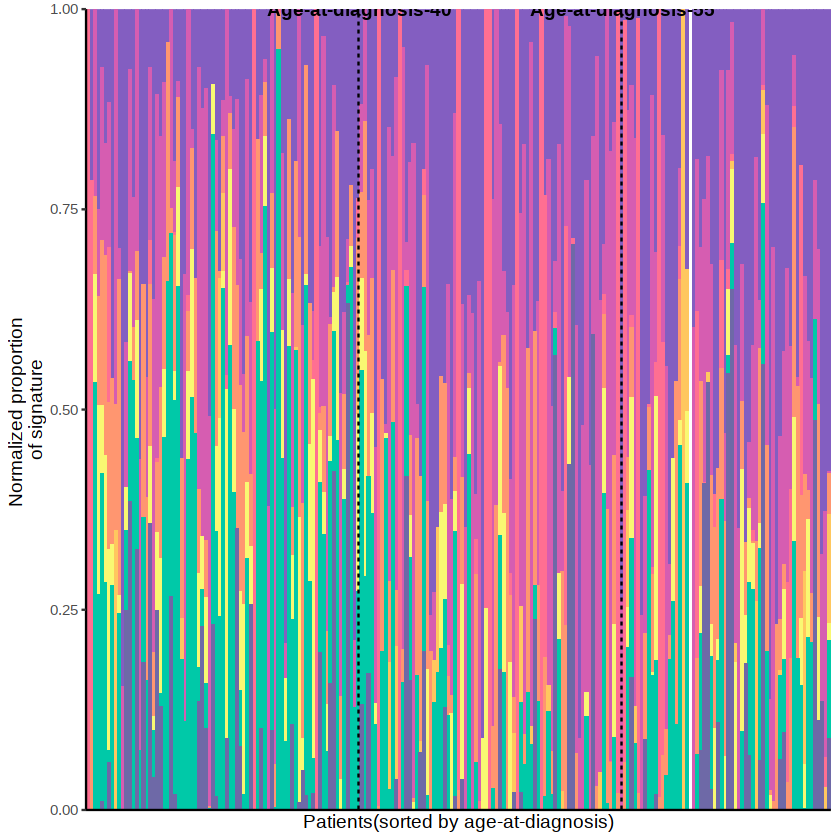

In [220]:
Firgure.3A1

In [221]:
Firgure.3A2 <- ggplot(data_long_m %>% filter(Signature %in% paste0("COSMIC_",c(1,6,10,15,20,24,29,30))), aes(x = factor(Sample,levels = age_order$Tumor_Sample_Barcode), y = Contribution, 
                               fill = factor(Signature), order = Sample)) + 
  geom_bar(stat = "identity") + 
  scale_y_continuous(expand = c(0,0)) + scale_x_discrete(breaks = NULL) +
  xlab("") + ylab("Number of mutations \n ") + 
  labs(fill="Mutation Signauture")+
  scale_fill_manual(values = c("COSMIC_1"="#835ec1",
                               "COSMIC_6"="#d65db1",
                               "COSMIC_10"="#ff6f92",
                               "COSMIC_15"="#ff9670",
                               "COSMIC_20"="#ffc75f",
                               "COSMIC_24"="#f9f872",
                               "COSMIC_29"="#00c9a8",
                                "COSMIC_30"= "#6e69a7"
                              )) + 
  theme_classic() +
  #scale_y_log10()+
  #theme(legend.position = c(0.5, 0.86)) +
  theme(legend.background = element_blank())

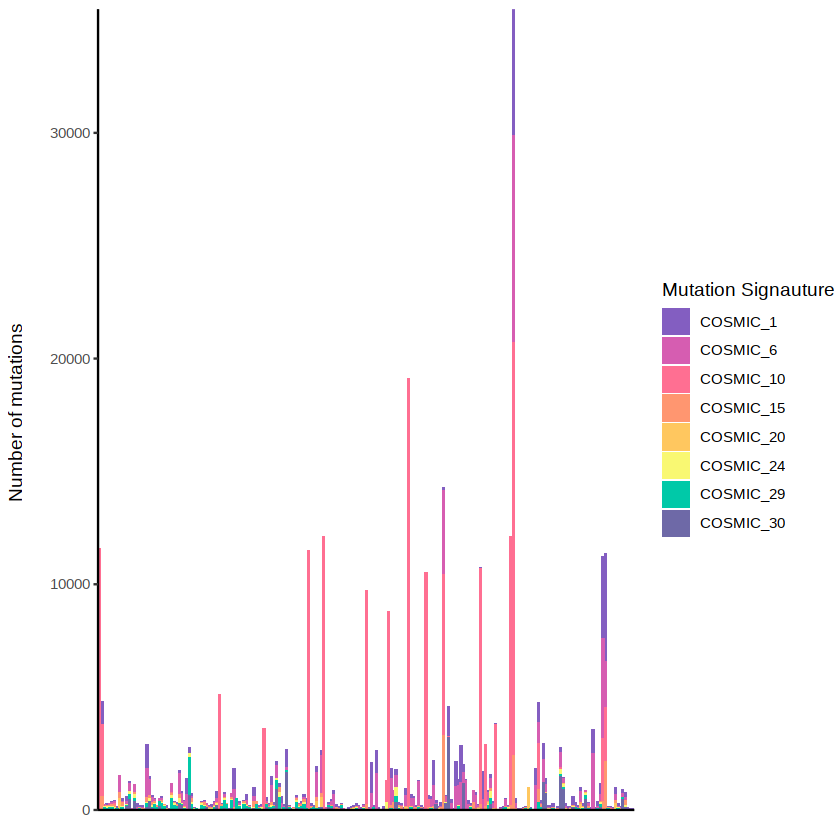

In [210]:
Firgure.3A2

In [211]:
library(patchwork)


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [225]:
Figure3A = Firgure.3A2/Firgure.3A1

Warning message:
“Removed 8 rows containing missing values (geom_bar).”


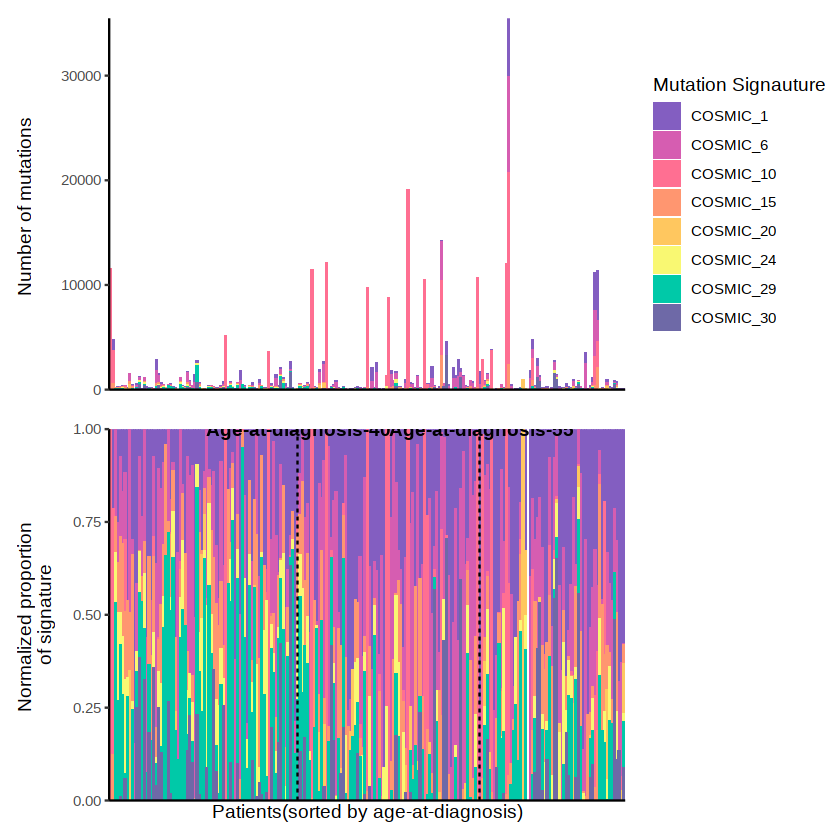

In [226]:
Figure3A

In [227]:
ggsave(Figure3,file="Figure.2/Figure.3A_signature_pct.pdf")

Saving 6.67 x 6.67 in image

Warning message:
“Removed 8 rows containing missing values (geom_bar).”


In [250]:
for (i in 1:30){
    p1 = ggscatter(common_cosmic_count_clin, x = "age_at_diagnosis", y = paste0("COSMIC_",i), 
              add = "reg.line", conf.int = TRUE, 
              add.params = list(color = "#3fa3ae", fill = "#deeded"),
              shape = 7,size= 1,color ="#585958",
              cor.coef = TRUE, cor.method = "spearman")
    ggsave(p1,file = paste0("Figure.2/cosmic_signature_spearman/cosmic_signature",i,"_spearman.pdf"))

    p2 = ggscatter(common_cosmic_count_clin, x = "age_at_diagnosis", y =  paste0("COSMIC_",i), 
              add = "reg.line", conf.int = TRUE, 
              add.params = list(color = "#3fa3ae", fill = "#deeded"),
              shape = 7,size= 1,color ="#585958",
              cor.coef = TRUE, cor.method = "pearson")
    
    ggsave(p2,file = paste0("Figure.2/cosmic_signature_spearman/cosmic_signature",i,"_pearson.pdf"))
}

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` usi

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


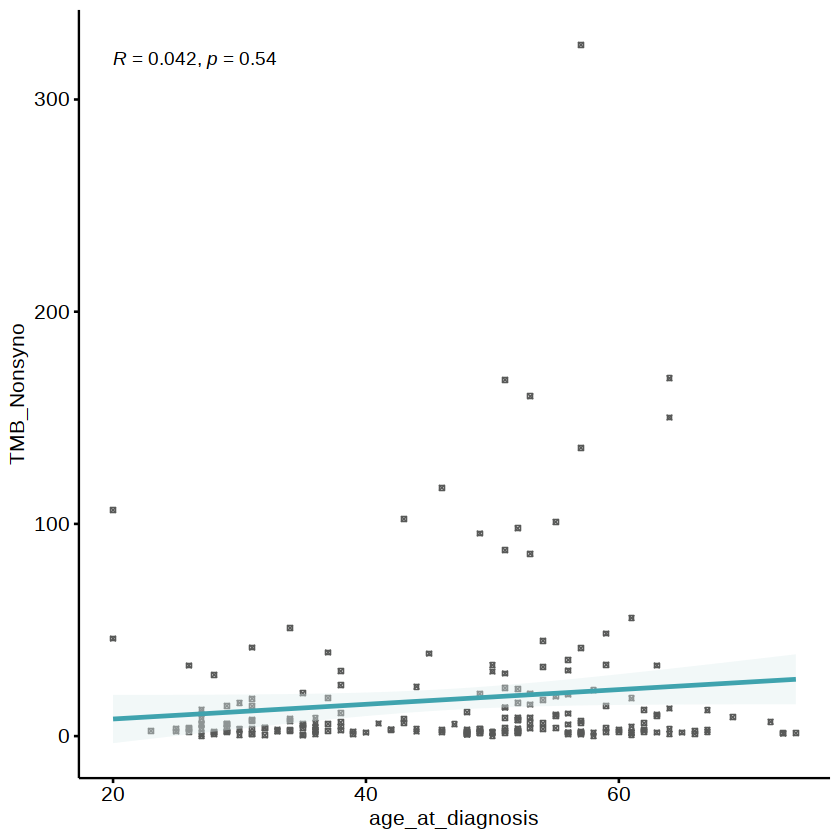

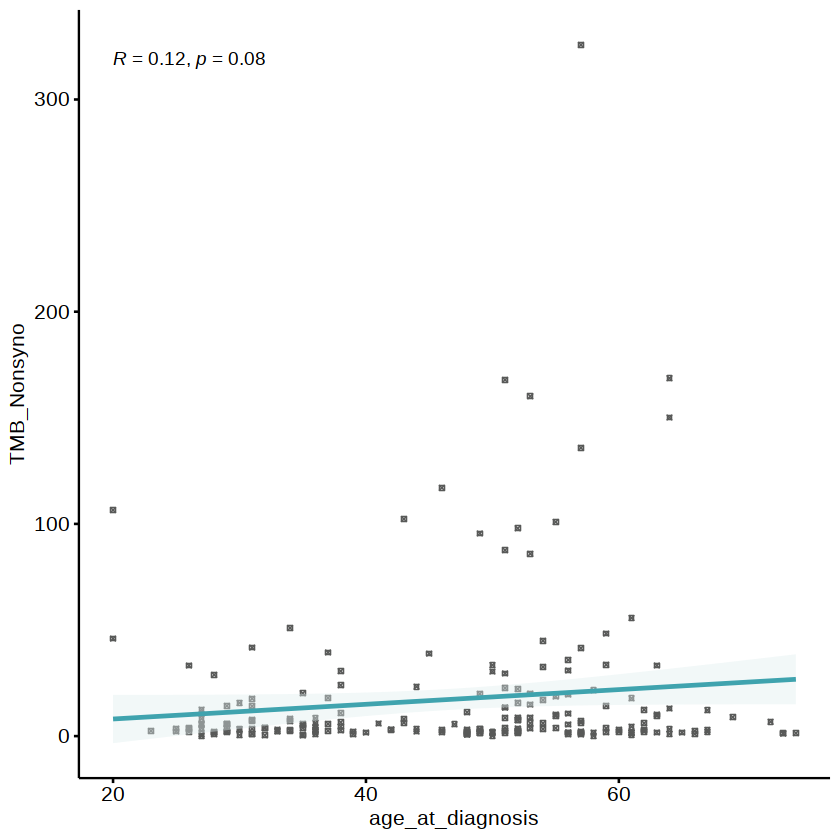

In [253]:
 p1 = ggscatter(common_Clin, x = "age_at_diagnosis", y = "TMB_Nonsyno", 
              add = "reg.line", conf.int = TRUE, 
              add.params = list(color = "#3fa3ae", fill = "#deeded"),
              shape = 7,size= 1,color ="#585958",
              cor.coef = TRUE, cor.method = "spearman")
p1
p2 = ggscatter(common_Clin, x = "age_at_diagnosis", y = "TMB_Nonsyno", 
              add = "reg.line", conf.int = TRUE, 
              add.params = list(color = "#3fa3ae", fill = "#deeded"),
              shape = 7,size= 1,color ="#585958",
              cor.coef = TRUE, cor.method = "pearson")
p2

In [254]:
ggsave(p1,filename = "Figure.2/TMB_spearman.pdf")
ggsave(p2,filename = "Figure.2/TMB_pearson.pdf")

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
